# Lecture 10: Useful libraries in Python (Solution)

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/ce311k/blob/main/notebooks/lectures/10_useful_libs/10_useful_libs.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/ce311k/blob/main/notebooks/lectures/10_useful_libs/10_useful_libs_solutions.ipynb)

- Sympy (Symbolic notations)
- Scipy (optimize)
- Fsolve (Linear and Nonlinear equations)
- Curve fitting

## Solving ordinary differential equations

[Sympy](<http://sympy.org/>) to solve some ODE examples. To use Sympy, we first need to import it and call `init_printing()` to get nicely typeset equations

In [4]:
import sympy
from sympy import symbols, Eq, Derivative, init_printing, Function, dsolve, exp, classify_ode, checkodesol

# This initialises pretty printing
init_printing()
from IPython.display import display

# Support for interactive plots
from ipywidgets import interact

# This command makes plots appear inside the browser window
%matplotlib inline

### Example: car breaking

During braking a car’s velocity is given by $v = v_{0} e^{−t/\tau}$. Calculate the distance travelled.

We first define the symbols in the equation ($t$, $\tau$ and $v_{0}$), and the function ($x$, for the displacement):

$$\frac{d x(t)}{dt} = v_{0} e^{−t/\tau} \quad \rightarrow \quad x(t) = \int v_{0} e^{−t/\tau} dt$$

In [5]:
t, tau, v0 = symbols("t tau v0")
x = Function("x")

Next, we define the differential equation, and print it to the screen for checking:

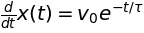

In [6]:
eqn = Eq(Derivative(x(t), t), v0*exp(-t/(tau)))
display(eqn)

The `dsolve` function solves the differential equation symbolically:

In [7]:
x = dsolve(eqn, x(t))
display(x)

where $C_{1}$ is a constant. As expected for a first-order equation, there is one constant.

SymPy is not yet very good at eliminating constants from initial conditions, so we will do this manually assuming that $x = 0$ and $t = 0$:

In [8]:
x = x.subs('C1', v0*tau)
display(x)

Specifying a value for $v_{0}$, we create an interactive plot of $x$ as a function of the parameter $\tau$:

In [9]:
x = x.subs(v0, 100)

def plot(τ=1.0):
    x1 = x.subs(tau, τ)

    # Plot position vs time
    sympy.plot(x1.args[1], (t, 0.0, 10.0), xlabel="time", ylabel="position");

interact(plot, τ=(0.0, 10, 0.2));

interactive(children=(FloatSlider(value=1.0, description='τ', max=10.0, step=0.2), Output()), _dom_classes=('w…

## Scipy Optimize


### Bisection

Find root of a function within an interval using bisection.

Basic bisection routine to find a zero of the function `f` between the arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.

In [10]:
from scipy import optimize

# Define a function
def f(x):
    return (x**2 - 1)

root = optimize.bisect(f, 0, 2)
print("The root of the function: {}".format(root))

The root of the function: 1.0


### Newton Raphson

Find a zero of the function func given a nearby starting point x0. 

In [11]:
from scipy import optimize

# Define a function
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

root = optimize.newton(f, 1.5)
print("The root of the function: {}".format(root))

The root of the function: 1.0000000000000016


# Systems of equations

## Linear equations

System of `m` equations $(i = 1, \dots, m)$ in $n$ unknowns $x_j \quad (j = 1, \dots, n)$ can be represented as $Ax = b$. For example, 

$$
\begin{align*}
x_1 + 2 x_2 & = 5\\
-3 x_1 + 4 x_2 & = 20 \\
\end{align*}
$$

$$
Ax = b \rightarrow
\begin{bmatrix}
1 & 2 \\
-3 & 4 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix}=
\begin{bmatrix}
5 \\
20 \\
\end{bmatrix}
$$

To solve a linear system of equations, we will use `numpy.linalg.solve`, which requires a matrix $A$ and a vector $b$ as arguments.

In [12]:
import numpy as np

# Define the matrix A and vector b
A = np.array([[1, 2], [-3, 4]])
b = np.array([5, -20])

# Solve the system of linear equations
x = np.linalg.solve(A, b)
print("The solution x: {}".format(x))

The solution x: [ 6.  -0.5]


## Non-linear equations

Solving a system of non-linear equations:

$$
\begin{align*}
x_1 + x_2^2 & = 4\\
e^{x_1} + x_1 x_2 & = 3 \\
\end{align*}
$$

We need to rearrange each equation such that we have 0 on the right-hand side.

$$
\begin{align*}
f_1(x) = x_1 + x_2^2 -4 & = 0\\
f_2(x) = e^{x_1} + x_1 x_2 -3 & = 0 \\
\end{align*}
$$

Non-linear system of equations can be solved using `scipy.optimize.fsolve`

In [10]:
from scipy.optimize import fsolve
import math

# z is a vector collecting x1 and x2
def equations(z):
    x1, x2 = z
    return (x1+x2**2 -4, math.exp(x1) + x1 * x2 - 3)

x1, x2 = fsolve(equations, (1, 1))

print("x1 is {:.3f}, x2 is {:.3f}".format(x1, x2))
print("Check if the solution for f(z) = 0")
print(equations((x1, x2)))

x1 is 0.620, x2 is 1.838
Check if the solution for f(z) = 0
(4.4508396968012676e-11, -1.0512035686360832e-11)


## Curve fitting

Linear and polynomial fits with `np.polyfit`

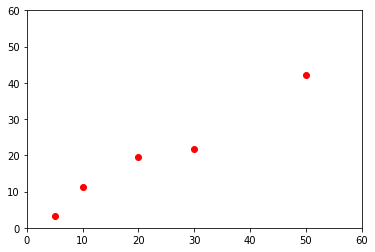

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5, 10,20,30,50]) 
y = np.array([3.3, 11.2, 19.5, 21.8, 42.3])

plt.plot(x, y, 'or')
plt.axis([0 , 60, 0 , 60])

plt.show()

In [12]:
# Fit a straight line through points
x = np.array([5, 10,20,30,50]) 
y = np.array([3.3, 11.2, 19.5, 21.8, 42.3])

# coefficients
coeffs = np.polyfit(x, y, 1)
polynomial = np.poly1d(coeffs)

print("The polynomial is: {}".format(polynomial))
print("Regression coefficients are: {}".format(coeffs))


The polynomial is:  
0.8056 x + 1.091
Regression coefficients are: [0.805625 1.090625]


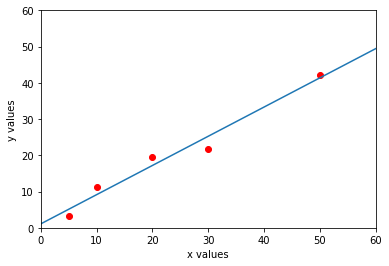

In [13]:
# Plot the fit
xp = np.linspace(0,60,100)

plt.plot(x, y, 'or', xp, polynomial(xp), '-')
plt.axis([0 , 60, 0 , 60])
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

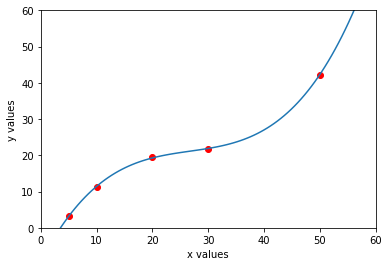

          3          2
0.001282 x - 0.1029 x + 2.973 x - 9.272


In [14]:
# Fit a cubic polynomial
x = np.array([5, 10,20,30,50]) 
y = np.array([3.3, 11.2, 19.5, 21.8, 42.3])

# coefficients
coeffs = np.polyfit(x, y, 3)
polynomial = np.poly1d(coeffs)

# Plot the fit
xp = np.linspace(0,60,100)

plt.plot(x, y, 'or', xp, polynomial(xp), '-')
plt.axis([0 , 60, 0 , 60])
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

print(polynomial)